## A2 Marketing Campaign - Team 6


Firas Bidawi,
Reem Tarakji,
Rodrigue N'senga,
Sahil Nadiyadra,
Shalini James Paulraj ,
Sharayu Mirajkar

Objective:
- Analyze customer acquisition channels and their impact on learning engagement.
- Identify the best markets for a $60/month subscription plan.
- Provide data-driven marketing recommendations.

Datasets:
1. **df_ecs (Existing Customer Segmentation)** - Contains data on acquisition channels and engagement.
2. **df_fds (Free Developer Survey)** - Provides insights into potential markets.
3. **df_sdd (Segmentation Data Details)** - Metadata about the datasets

In [30]:
#Importing Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

##Loading the Data


In [31]:
#mount drive
from google.colab import drive
drive.mount('/content/drive')


# Load data with more intuitive dataframe names
df_ecs = pd.read_csv('/content/drive/My Drive/Colab Notebooks/CDAP2025/Group Assignment/Data/survey1_existing_customer_segmentation_data.csv')
df_sdd = pd.read_excel('/content/drive/My Drive/Colab Notebooks/CDAP2025/Group Assignment/Data/survey1_segmentation data details.xlsx')
df_fds = pd.read_csv('/content/drive/My Drive/Colab Notebooks/CDAP2025/Group Assignment/Data/survey2_free_developer-survey.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<ipython-input-31-97c30f6cb719>:9: DtypeWarning: Columns (17,62) have mixed types. Specify dtype option on import or set low_memory=False.
  df_fds = pd.read_csv('/content/drive/My Drive/Colab Notebooks/CDAP2025/Group Assignment/Data/survey2_free_developer-survey.csv')


# Understanding the Data

## Preview


In [32]:
print("df_ecs Head:")
print(df_ecs.head())



df_ecs Head:
   minutes_watched     CLV  region  channel
0           3197.0  205.42       2        4
1             63.0  149.99       0        1
2            605.0  119.00       2        2
3             20.0  240.00       2        4
4            245.0  184.36       1        4


In [33]:
print("df_sdd Head:")
print(df_sdd.head())

df_sdd Head:
   Unnamed: 0 Segmentation data - Legend Unnamed: 2 Unnamed: 3  \
0         NaN                        NaN        NaN        NaN   
1         NaN                        NaN        NaN        NaN   
2         NaN                   Variable  Data type      Range   
3         NaN            minutes watched  numerical    Integer   
4         NaN                        NaN        NaN        NaN   

                                          Unnamed: 4  
0                                                NaN  
1                                                NaN  
2                                        Description  
3  The number of minutes a student has watched si...  
4                                                NaN  


In [34]:
print("df_fds Head:")
print(df_fds.head())


df_fds Head:
    Age  AttendedBootcamp  BootcampFinish  BootcampLoanYesNo BootcampName  \
0  27.0               0.0             NaN                NaN          NaN   
1  34.0               0.0             NaN                NaN          NaN   
2  21.0               0.0             NaN                NaN          NaN   
3  26.0               0.0             NaN                NaN          NaN   
4  20.0               0.0             NaN                NaN          NaN   

   BootcampRecommend  ChildrenNumber                 CityPopulation  \
0                NaN             NaN            more than 1 million   
1                NaN             NaN              less than 100,000   
2                NaN             NaN            more than 1 million   
3                NaN             NaN  between 100,000 and 1 million   
4                NaN             NaN  between 100,000 and 1 million   

   CodeEventConferences  CodeEventDjangoGirls  ...  YouTubeFCC  \
0                   NaN        

In [35]:
# Checking the shape of each dataframe
print("df_ecs Shape:", df_ecs.shape)
print("df_sdd Shape:", df_sdd.shape)
print("df_fds Shape:", df_fds.shape)

# df_ecs has 3,834 rows and 4 columns, df_sdd has 22 rows and 5 columns, and df_fds has 18,175 rows and 136 columns.




df_ecs Shape: (3834, 4)
df_sdd Shape: (22, 5)
df_fds Shape: (18175, 136)


In [36]:
# Check column data types
df_ecs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3834 entries, 0 to 3833
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   minutes_watched  3725 non-null   float64
 1   CLV              3834 non-null   float64
 2   region           3834 non-null   int64  
 3   channel          3834 non-null   int64  
dtypes: float64(2), int64(2)
memory usage: 119.9 KB


In [37]:
df_sdd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 5 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Unnamed: 0                  0 non-null      float64
 1   Segmentation data - Legend  5 non-null      object 
 2   Unnamed: 2                  5 non-null      object 
 3   Unnamed: 3                  16 non-null     object 
 4   Unnamed: 4                  16 non-null     object 
dtypes: float64(1), object(4)
memory usage: 1012.0+ bytes


In [38]:
df_fds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18175 entries, 0 to 18174
Columns: 136 entries, Age to YouTubeTheNewBoston
dtypes: float64(105), object(31)
memory usage: 18.9+ MB


## Data Exploration

###Summary Statistics

In [39]:
#Existing customer segmentation
df_ecs.describe()


,minutes_watched,CLV,region,channel
count,3725.000000,3834.000000,3834.000000,3834.000000
mean,1972.094497,118.383920,1.167188,3.870370
std,7401.693028,70.471274,0.923055,2.191972
min,0.000000,0.000000,0.000000,1.000000
25%,159.000000,62.580000,0.000000,2.000000
50%,512.000000,119.000000,2.000000,3.000000
75%,1521.000000,149.990000,2.000000,6.000000
max,288508.000000,626.400000,2.000000,8.000000


The average is 1984.05 minutes, with a max of 288508 minutes, indicating a few highly engaged users. The min of 0 suggests some users haven't watched any content. The high standard deviation (7425.19) shows considerable variability, with many users clustered at the lower end.
Customer Lifetime Value (CLV):

The average CLV is 118.60, with a max of 626.40, indicating some high-value customers. The standard deviation (70.73) reflects moderate variability in customer value.
Conclusion:
The data shows a mix of low and high engagement, with some users consuming a lot of content and others none at all. Similarly, there’s a diverse range of customer value, with a few highly valuable customers.

In [40]:
#Free developer survey
df_fds.describe()

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampRecommend,ChildrenNumber,CodeEventConferences,CodeEventDjangoGirls,CodeEventFCC,CodeEventGameJam,...,YouTubeEngineeredTruth,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeSimplilearn,YouTubeTheNewBoston
count,15367.000000,17709.000000,1069.000000,1079.000000,1073.000000,2314.000000,1609.0,165.0,1708.0,290.0,...,993.0,6036.0,1261.0,3539.0,2662.0,1396.0,3327.0,622.0,201.0,2960.0
mean,27.691872,0.062002,0.699719,0.305839,0.818267,1.832325,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
std,8.559239,0.241167,0.458594,0.460975,0.385805,0.972813,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
25%,22.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
50%,26.000000,0.000000,1.000000,0.000000,1.000000,2.000000,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
75%,32.000000,0.000000,1.000000,1.000000,1.000000,2.000000,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
max,90.000000,1.000000,1.000000,1.000000,1.000000,9.000000,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


Age: The average age is 27.69 years, with a range from 0 to 90 years. Most participants are between 22 and 32 years old.

Bootcamp Data: 6.2% attended a bootcamp, and 69.97% of those finished it.
30.58% received a loan for bootcamp fees, and 81.83% would recommend the bootcamp.



### Check missing values


In [41]:
print("Missing values in df_ecs:")
print(df_ecs.isnull().sum())

print("\nMissing values in df_sdd:")
print(df_sdd.isnull().sum())

print("\nMissing values in df_fds:")
print(df_fds.isnull().sum())



Missing values in df_ecs:
minutes_watched    109
CLV                  0
region               0
channel              0
dtype: int64

Missing values in df_sdd:
Unnamed: 0                    22
Segmentation data - Legend    17
Unnamed: 2                    17
Unnamed: 3                     6
Unnamed: 4                     6
dtype: int64

Missing values in df_fds:
Age                     2808
AttendedBootcamp         466
BootcampFinish         17106
BootcampLoanYesNo      17096
BootcampName           17226
                       ...  
YouTubeMIT             14848
YouTubeMozillaHacks    17553
YouTubeOther           17027
YouTubeSimplilearn     17974
YouTubeTheNewBoston    15215
Length: 136, dtype: int64


For df_ecs (Existing Customer Segmentation)
Only minutes_watched has 109 missing values.
Other columns (CLV, region, channel) have no missing values.

In [42]:
def missing_percentage_list(df):
    """
    Calculates the percentage of missing values for each column in a DataFrame.

    Args:
        df (pd.DataFrame): The input DataFrame.

    Returns:
        list: A list of tuples containing column names and their missing percentages.
    """
    missing_percentage = df.isnull().sum() * 100 / len(df)
    missing_list = [(col, percentage) for col, percentage in missing_percentage.items()]
    return missing_list

# Assuming 'df_fds' is your free developer survey DataFrame
missing_developer = missing_percentage_list(df_fds)

# Printing missing data percentages
print("\nMissing Data Percentage in Developer Survey Data:")
for col, percentage in missing_developer:
    print(f"{col}: {percentage:.2f}%")


Missing Data Percentage in Developer Survey Data:
Age: 15.45%
AttendedBootcamp: 2.56%
BootcampFinish: 94.12%
BootcampLoanYesNo: 94.06%
BootcampName: 94.78%
BootcampRecommend: 94.10%
ChildrenNumber: 87.27%
CityPopulation: 15.52%
CodeEventConferences: 91.15%
CodeEventDjangoGirls: 99.09%
CodeEventFCC: 90.60%
CodeEventGameJam: 98.40%
CodeEventGirlDev: 98.37%
CodeEventHackathons: 89.12%
CodeEventMeetup: 86.40%
CodeEventNodeSchool: 97.55%
CodeEventNone: 94.08%
CodeEventOther: 96.86%
CodeEventRailsBridge: 99.27%
CodeEventRailsGirls: 99.27%
CodeEventStartUpWknd: 97.01%
CodeEventWkdBootcamps: 96.99%
CodeEventWomenCode: 97.35%
CodeEventWorkshops: 90.35%
CommuteTime: 49.13%
CountryCitizen: 15.37%
CountryLive: 15.62%
EmploymentField: 55.35%
EmploymentFieldOther: 94.07%
EmploymentStatus: 21.07%
EmploymentStatusOther: 95.42%
ExpectedEarning: 60.39%
FinanciallySupporting: 78.91%
FirstDevJob: 75.20%
Gender: 14.97%
GenderOther: 99.70%
HasChildren: 78.77%
HasDebt: 15.87%
HasFinancialDependents: 15.66%


df_fds (Free Developer Survey)
Significant missing data across multiple columns:
Age: 2808 missing values (~15% missing)
BootcampFinish, BootcampLoanYesNo, BootcampName: ~94% missing
Many YouTube columns (such as YouTubeMIT, YouTubeMozillaHacks) have ~80% missing.

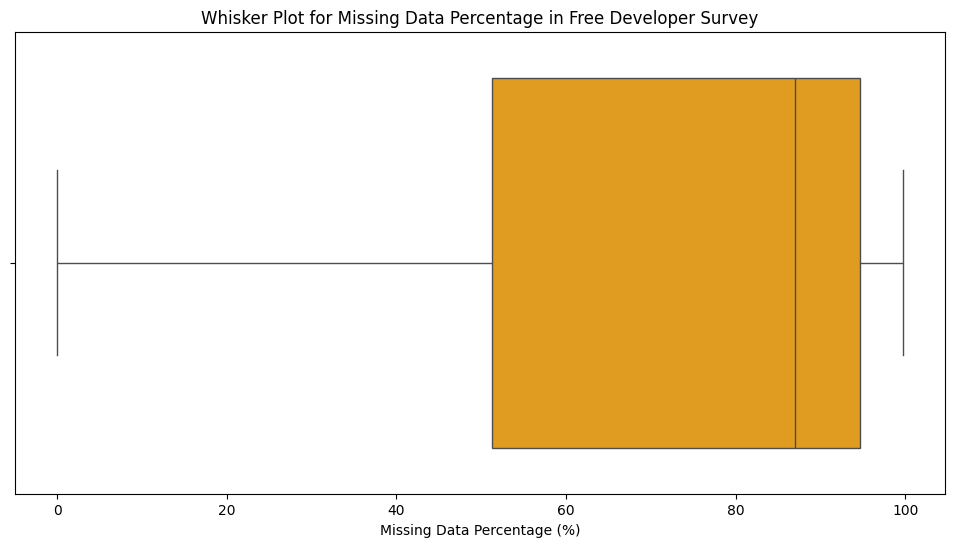

In [43]:
# Calculate missing data percentages
missing_percentage = df_fds.isnull().sum() * 100 / len(df_fds)

missing_df = pd.DataFrame(missing_percentage, columns=["Missing Percentage"])

# Plotting the whisker (box) plot
plt.figure(figsize=(12, 6))
sns.boxplot(data=missing_df, x=missing_df['Missing Percentage'], color='orange')
plt.title("Whisker Plot for Missing Data Percentage in Free Developer Survey")
plt.xlabel("Missing Data Percentage (%)")
plt.show()


This whisker plot indicates that the dataset has many columns with substantial missing data, with the majority of missing values concentrated in the 50-85% range.

#Data Cleaning

In [44]:
# Remove duplicate entries
df_ecs.drop_duplicates(inplace=True)
df_fds.drop_duplicates(inplace=True)

##Mapping Categorical Variables (Region and Channel)

In [45]:
# Mapping dictionaries for Region and Channel
region_mapping = {
    0: "USA, Canada, United Kingdom, Australia",
    1: "Western Europe",
    2: "Rest of the World"
}

channel_mapping = {
    1: "Google",
    2: "Facebook",
    3: "YouTube",
    4: "LinkedIn",
    5: "Twitter",
    6: "Instagram",
    7: "Friend",
    8: "Other"
}

# Map region and channel using the dictionaries
df_ecs['region'] = df_ecs['region'].map(region_mapping)
df_ecs['channel'] = df_ecs['channel'].map(channel_mapping)

# Check the first few rows to verify
print(df_ecs[['region', 'channel']].head())


                                   region   channel
0                       Rest of the World  LinkedIn
1  USA, Canada, United Kingdom, Australia    Google
2                       Rest of the World  Facebook
3                       Rest of the World  LinkedIn
4                          Western Europe  LinkedIn


#Exploratory Data Analysis (EDA)

##Existing Customers

In [46]:
#Identifying High-Value Customers (top 25% of CLV)
high_value_customers = df_ecs[df_ecs['CLV'] > df_ecs['CLV'].quantile(0.75)]
print("High-Value Customers Overview:")
print(high_value_customers.describe())


High-Value Customers Overview:
       minutes_watched         CLV
count        913.00000  946.000000
mean        2949.64184  208.044302
std         8227.48659   64.987745
min            0.00000  150.000000
25%          194.00000  174.000000
50%          658.00000  183.220000
75%         2303.00000  218.945000
max       109109.00000  626.400000


This group of high-value customers (top 25% of CLV) has an average CLV of 208 and an average of 2949 minutes watched. While most customers watch around 658 minutes, there are significant outliers, with some having over 100,000 minutes watched. This indicates a correlation between engagement and CLV, but with notable exceptions, highlighting potential opportunities for targeted strategies.

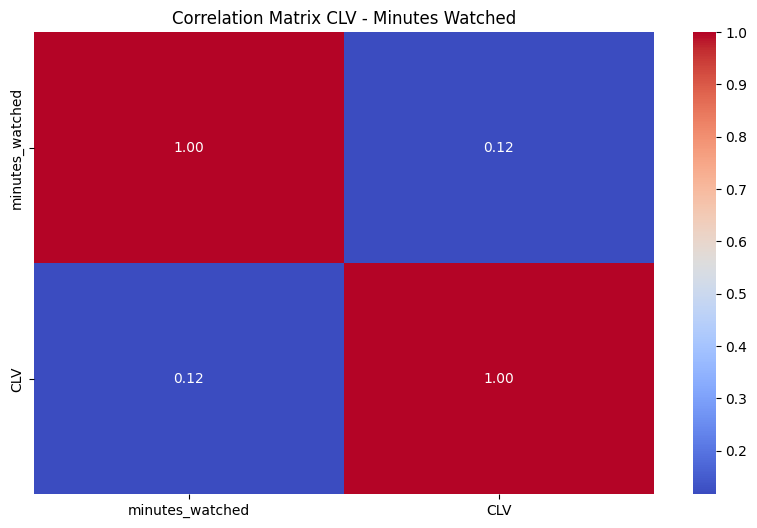

In [47]:
# Selecting only numeric columns from df_ecs
df_ecs_numeric = df_ecs.select_dtypes(include=[np.number])

# Calculating the correlation matrix
df_ecs_corr = df_ecs_numeric.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(df_ecs_corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix CLV - Minutes Watched")
plt.show()



Since the correlation between CLV and minutes watched is low, this could imply that there may be other better features that correlate more strongly with CLV.

### A. Acquisition Channel vs. Engagement

<ipython-input-48-2b075a24d47f>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=channel_engagement.index, y=channel_engagement.values, palette='viridis')


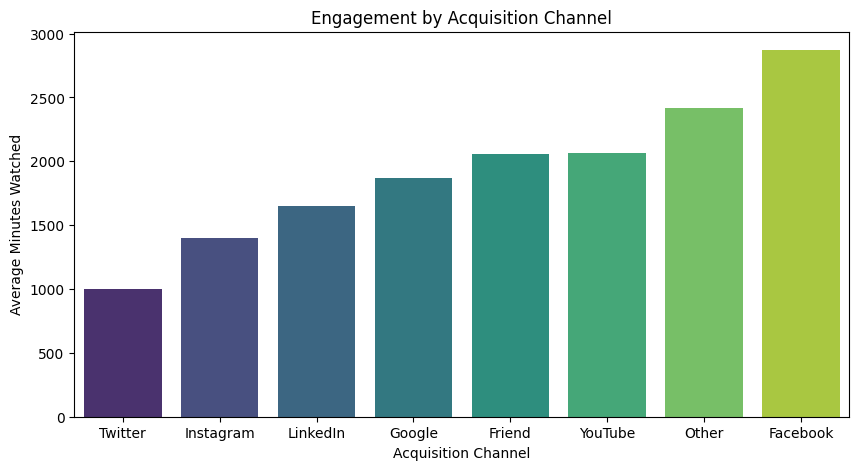

In [48]:
# Average minutes watched per acquisition channel
channel_engagement = df_ecs.groupby('channel')['minutes_watched'].mean().sort_values()
plt.figure(figsize=(10,5))
sns.barplot(x=channel_engagement.index, y=channel_engagement.values, palette='viridis')
plt.xlabel("Acquisition Channel")
plt.ylabel("Average Minutes Watched")
plt.title("Engagement by Acquisition Channel")
plt.show()

The bar chart displays the average minutes watched by users across various acquisition channels.

Facebook has the highest average engagement, with users watching nearly 3000 minutes on average.
Twitter has the lowest average engagement, with 1000 minutes watched.
Other platforms like YouTube, Google, and Friend show moderate engagement, with averages between 1500 and 2000 minutes.
This suggests that Facebook is the most effective channel in driving high engagement, while Twitter lags behind. Friend referrals, while not as strong as other channels, still show notable user participation, likely driven by personal recommendations.

### B. Geographical Analysis

<ipython-input-49-2977df298d55>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_ecs, x='region', palette='coolwarm')


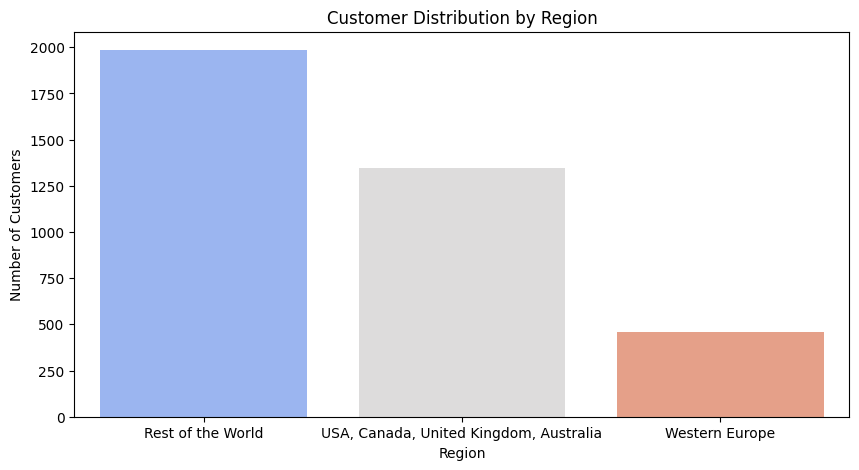

In [49]:
# Customer Distribution by Region
plt.figure(figsize=(10,5))
sns.countplot(data=df_ecs, x='region', palette='coolwarm')
plt.xlabel("Region")
plt.ylabel("Number of Customers")
plt.title("Customer Distribution by Region")
plt.show()

- The rest of the World has the highest customer count, with a little under 2000 customers, suggesting that the platform has a broad international reach.
- USA, Canada, United Kingdom, Australia represents the second-highest customer group, with over 1200 customers, indicating strong engagement in English-speaking countries.
- Western Europe has the lowest customer count, with just under 500 customers, suggesting that this region may have lower penetration or engagement compared to other regions.

This distribution highlights that the platform has strong international appeal, but may want to consider targeting Western Europe more strategically to boost engagement.

### C. Engagement Distribution Analysis


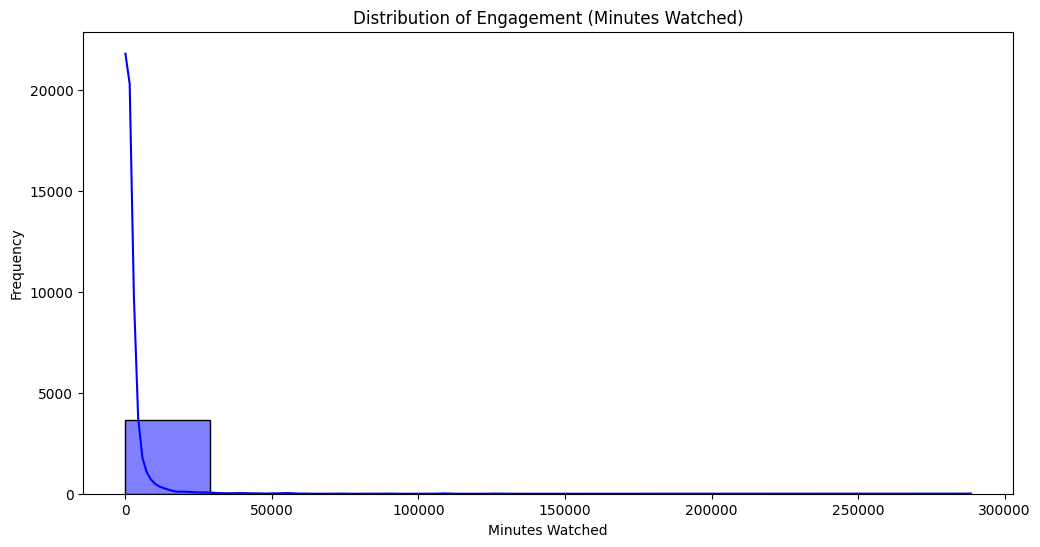

In [50]:
plt.figure(figsize=(12,6))
sns.histplot(df_ecs['minutes_watched'], bins=10, kde=True, color='blue')
plt.xlabel("Minutes Watched")
plt.ylabel("Frequency")
plt.title("Distribution of Engagement (Minutes Watched)")
plt.show()

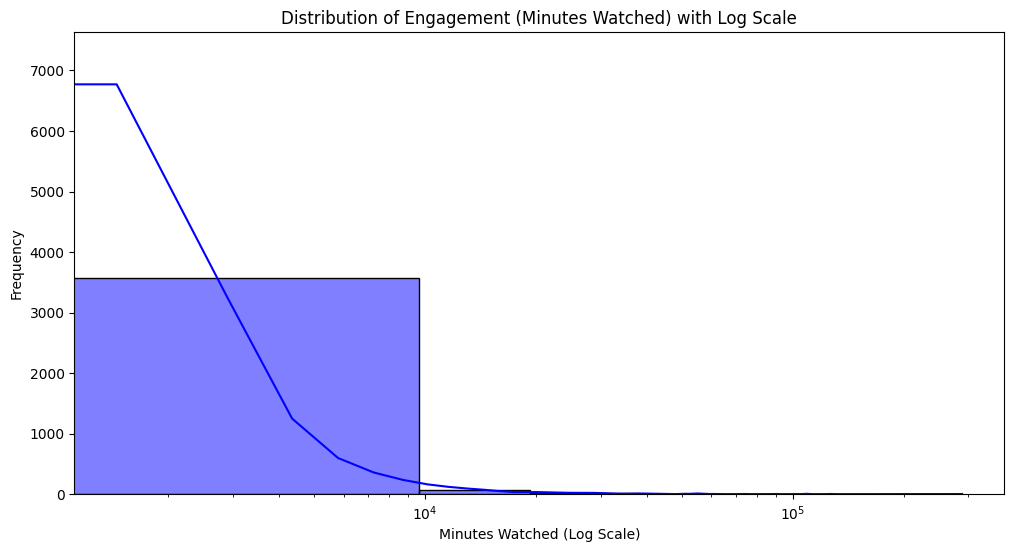

In [51]:
# Using log scale to improve the visualization of the distribution of minutes watched, especially to highlight the outliers
plt.figure(figsize=(12,6))
sns.histplot(df_ecs['minutes_watched'], bins=30, kde=True, color='blue')

plt.xscale('log')

plt.xlabel("Minutes Watched (Log Scale)")
plt.ylabel("Frequency")
plt.title("Distribution of Engagement (Minutes Watched) with Log Scale")

plt.show()

The histogram of minutes watched on a log scale reveals a highly skewed distribution. A significant portion of users have low engagement, with a sharp drop-off in frequency as the minutes watched increase. There are a few extreme outliers with notably higher values, but the majority of users tend to watch far fewer minutes. This suggests that the platform may have many casual users who engage for brief periods, while a smaller group of highly engaged users skew the data towards higher values

###D. Region-wise engagement


<ipython-input-52-f87bcdf299fd>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=region_engagement.index, y=region_engagement.values, palette='magma')


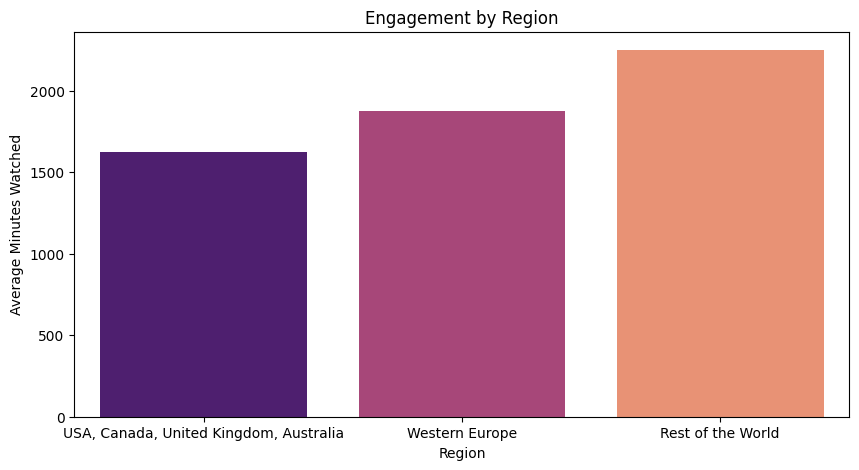

In [52]:
region_engagement = df_ecs.groupby('region')['minutes_watched'].mean().sort_values()

plt.figure(figsize=(10, 5))
sns.barplot(x=region_engagement.index, y=region_engagement.values, palette='magma')
plt.xlabel("Region")
plt.ylabel("Average Minutes Watched")
plt.title("Engagement by Region")
plt.show()


Customers from the "Rest of the World" region have the highest average minutes watched, followed by those from "Western Europe." "USA, Canada, United Kingdom, Australia" has the lowest average engagement. Highlighting a notable difference in engagement across regions.

###E. Average Minutes Watched by Channel and Region

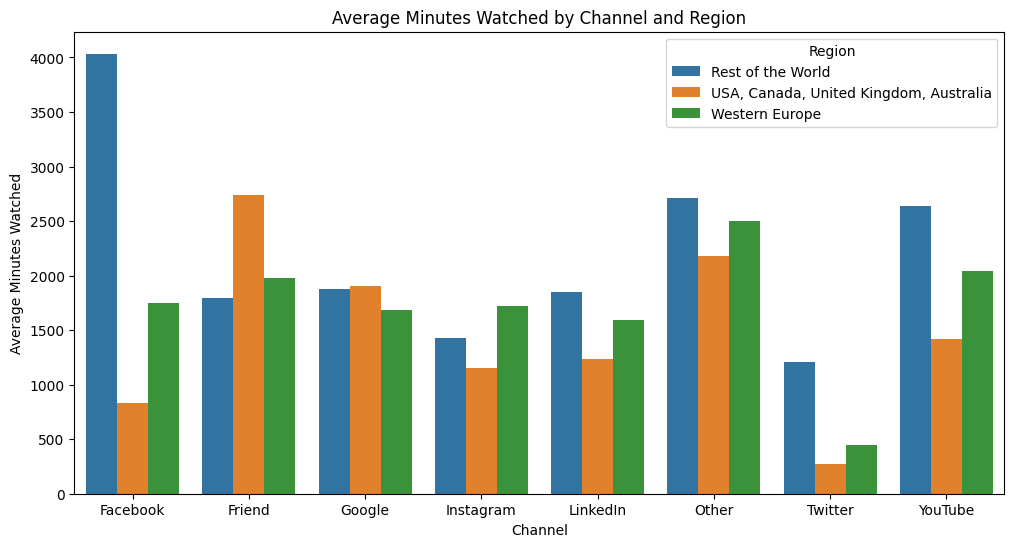

In [53]:
# Group by 'channel' and 'region', then calculate average minutes watched
channel_region_analysis = df_ecs.groupby(['channel', 'region'])['minutes_watched'].mean().reset_index()

# Visualize the results
plt.figure(figsize=(12, 6))
sns.barplot(data=channel_region_analysis, x='channel', y='minutes_watched', hue='region')
plt.title("Average Minutes Watched by Channel and Region")
plt.xlabel("Channel")
plt.ylabel("Average Minutes Watched")
plt.legend(title="Region")
plt.show()


- The bar chart reveals that Facebook has the highest average minutes watched across all regions, with the Rest of the World showing the strongest engagement.
- Friend acquisitions have notable engagement in the USA, Canada, United Kingdom, and Australia, while Google and YouTube maintain steady performance across all regions.
- Western Europe shows consistent but lower engagement compared to other regions. This indicates that Facebook is the leading channel for engagement, with specific channels performing better in different regional markets.

##Free Developer Survey

### A. Subscription Market Geographic Analysis

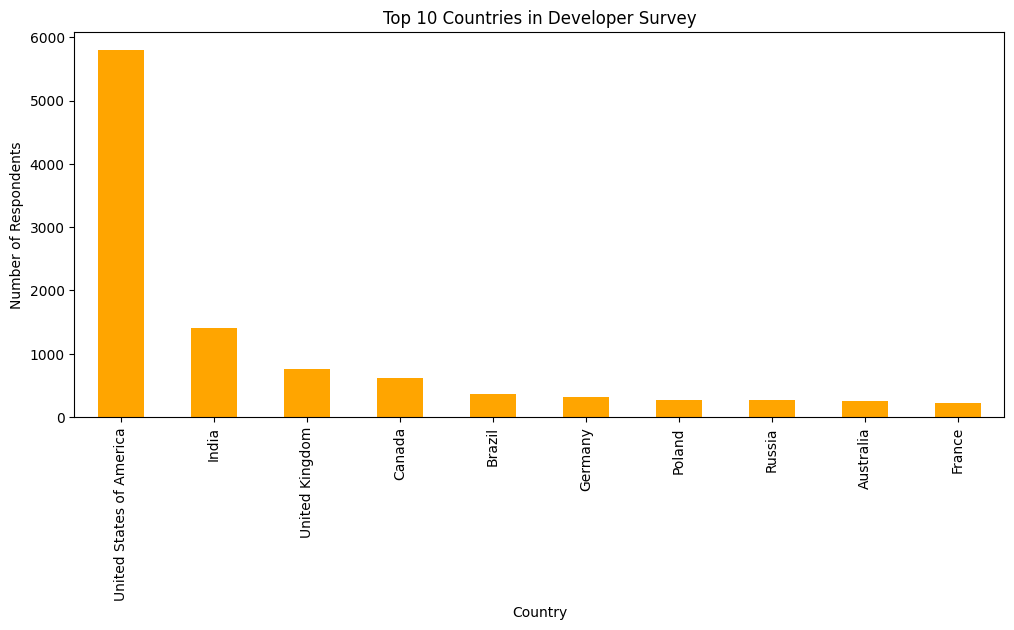

In [54]:
# Identifying top countries for targeting
plt.figure(figsize=(12,5))
df_fds['CountryLive'].value_counts().head(10).plot(kind='bar', color='orange')
plt.xlabel("Country")
plt.ylabel("Number of Respondents")
plt.title("Top 10 Countries in Developer Survey")
plt.show()

The bar chart shows the top 10 countries with the highest number of respondents in the developer survey.


- United States stands out with a substantial lead, having over 5000 respondents, making it the largest market for the survey.
- India comes second with a significant number of respondents, but still much lower than the U.S.
- Other countries like United Kingdom, Canada, and Germany contribute much smaller numbers of respondents, indicating regional concentration in the U.S. and India.

This suggests that United States and India should be prioritized for subscription market targeting, as they have the largest developer communities based on this survey. Further regional adjustments may be needed for smaller markets like the UK and Canada.

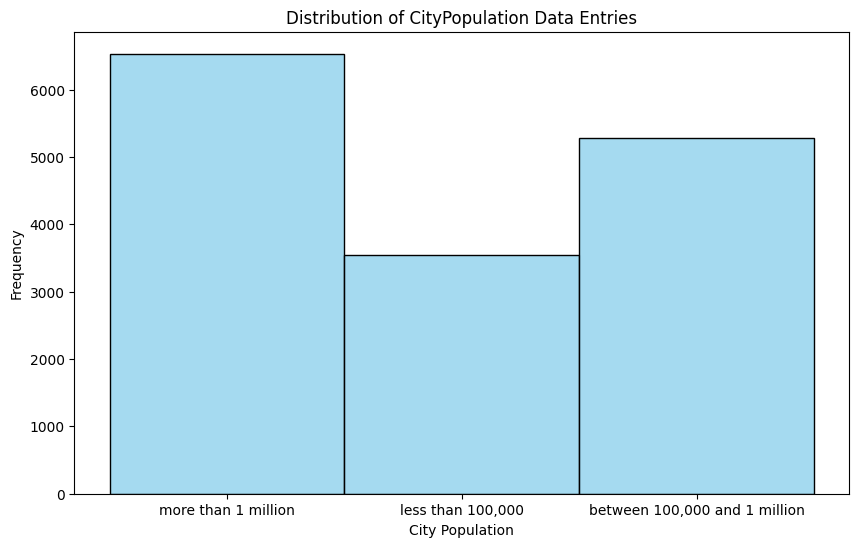

In [55]:
# City Population
plt.figure(figsize=(10, 6))
sns.histplot(df_fds['CityPopulation'], kde=False, bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of CityPopulation Data Entries')
plt.xlabel('City Population')
plt.ylabel('Frequency')
plt.show()


The majority of respondents are from cities with populations of more than 1 million, followed by those from cities with populations between 100,000 and 1 million. A smaller proportion of respondents are from cities with populations under 100,000. This indicates a concentration of participants from larger urban areas.

###B. Engagement Distribution Analysis

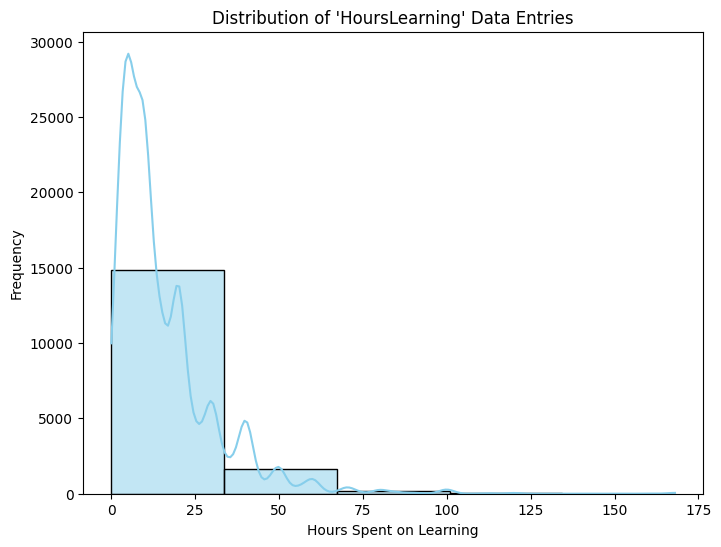

In [56]:
# Plotting histogram for 'HoursLearning' column
plt.figure(figsize=(8, 6))
sns.histplot(df_fds['HoursLearning'], bins=5, kde=True, color='skyblue', edgecolor='black')
plt.title("Distribution of 'HoursLearning' Data Entries")
plt.xlabel("Hours Spent on Learning")
plt.ylabel("Frequency")
plt.show()


The distribution shows a clear majority of participants spent very few hours (0–25) on learning, with a sharp drop-off in frequency as hours increase. A small subset of participants engaged in more learning (up to 100 hours). This indicates a high concentration of users spending minimal time learning. (8.02% of data entries in the column are empty. However, the input derived is still valuable)

###C. Educational Demographics

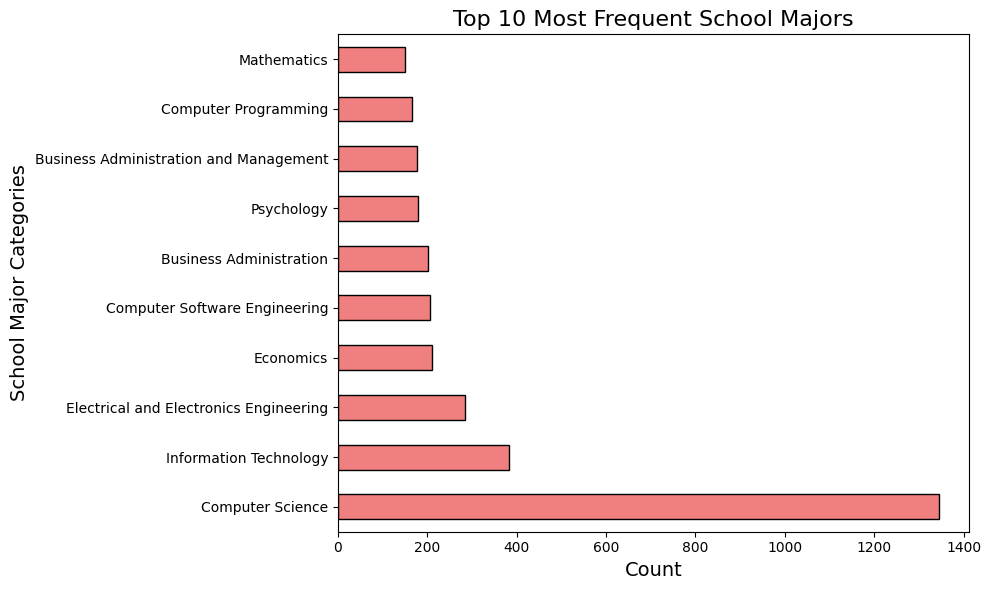

In [57]:
# Plotting the distribution of 'SchoolMajor' with improved readability

# Count the occurrences of each category
school_major_counts = df_fds['SchoolMajor'].value_counts()

# Limit the plot to top 10 most frequent categories
top_10_school_majors = school_major_counts.head(10)

# Plotting the top 10 most frequent school majors
plt.figure(figsize=(10, 6))
top_10_school_majors.plot(kind='barh', color='lightcoral', edgecolor='black')

# Adding title and labels
plt.title("Top 10 Most Frequent School Majors", fontsize=16)
plt.xlabel("Count", fontsize=14)
plt.ylabel("School Major Categories", fontsize=14)
plt.tight_layout()  # Adjust the layout to fit the labels
plt.show()


The most popular school major category is Computer Science, followed by a mix of related fields such as Mathematics, Computer Programming, and Information Technology. This indicates that the majority of respondents are from technical fields, specifically those related to computing and programming. There is also a significant number of participants with backgrounds in Business Administration, suggesting a balanced interest between technical and business-oriented skill sets.(51.98% of data entries in the column are missing. However,given the volume of data entries, the input derived is still valuable)

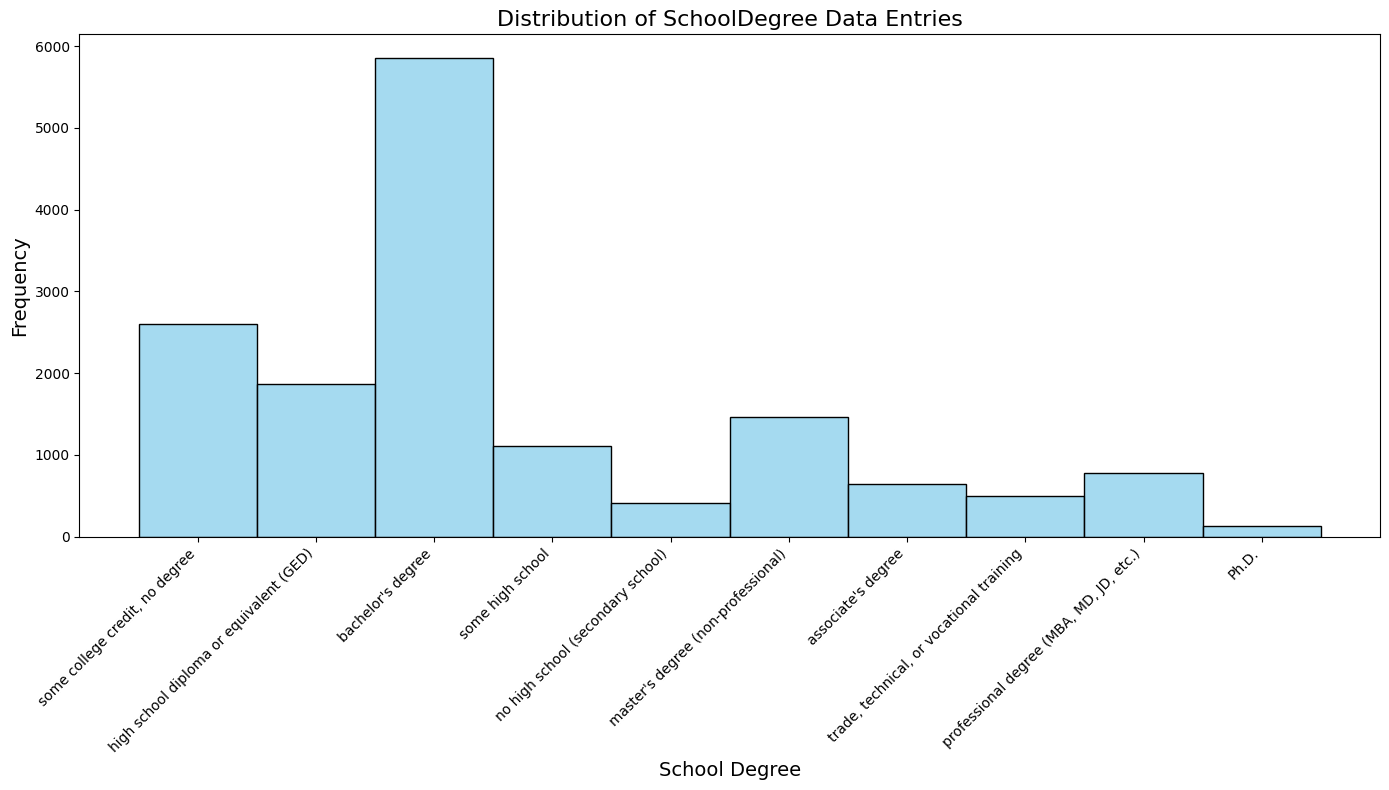

In [58]:
# School Degree
plt.figure(figsize=(14, 8))  # Increase figure size for better readability
sns.histplot(df_fds['SchoolDegree'], kde=False, bins=30, color='skyblue', edgecolor='black')

# Title and labels
plt.title('Distribution of SchoolDegree Data Entries', fontsize=16)
plt.xlabel('School Degree', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45, ha='right')

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()


The most common degree is a Bachelor's degree, followed by some college credit with no degree. Other degrees, such as Master's, Associate's, and Professional degrees, have significantly fewer entries, indicating that most respondents have a relatively high level of education, but there is a noticeable drop-off for higher degrees like Ph.D.

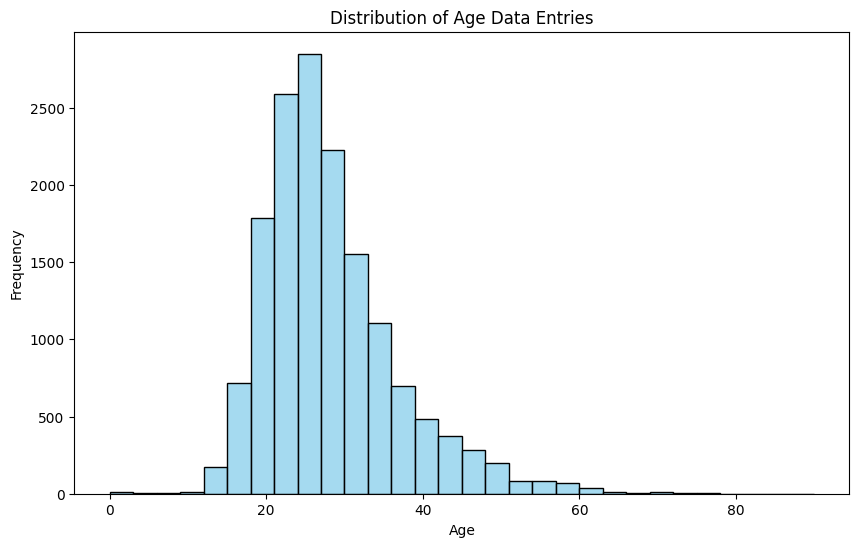

In [59]:
# Age distribution
plt.figure(figsize=(10, 6))
sns.histplot(df_fds['Age'], kde=False, bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Age Data Entries')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


The age distribution follows a left-skewed pattern, with a significant concentration of users in the 20-30 age group. This suggests that the platform or survey appeals predominantly to younger individuals, most likely in the early stages of their careers or pursuing higher education. The frequency gradually decreases with older age brackets, with minimal participation from individuals above 60, highlighting a youthful demographic.

The survey respondents are largely young, well-educated individuals with a strong focus on technology, particularly those with backgrounds in Computer Science, Information Technology, and related technical fields. This demographic is highly likely to be pursuing or already involved in careers within the technology and software development sectors, with a growing interest in business management.

###D. Career and Financial distribution

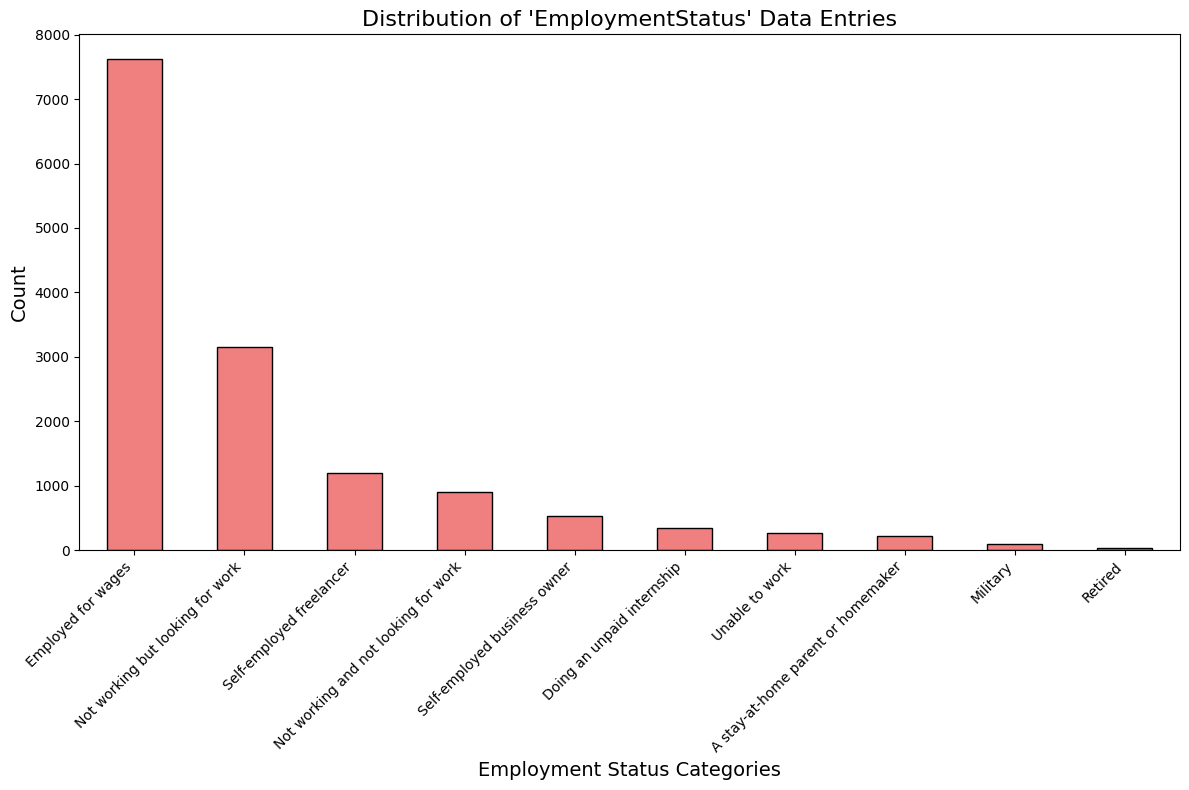

In [60]:
# Plotting histogram for 'EmploymentStatus'
plt.figure(figsize=(12, 8))  # Increased figure size
df_fds['EmploymentStatus'].value_counts().plot(kind='bar', color='lightcoral', edgecolor='black')
plt.title("Distribution of 'EmploymentStatus' Data Entries", fontsize=16)
plt.xlabel("Employment Status Categories", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


The Employment Status distribution suggests that the bulk of respondents are currently in the workforce, specifically employed for wages, while a significant portion is actively seeking work.(21.07% of data entries in the column are missing. However, given the volume of data entries, the input derived is still valuable)




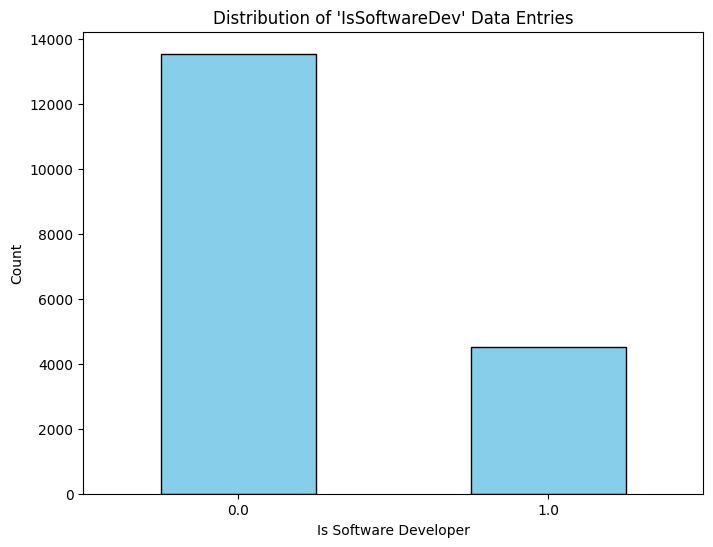

In [61]:
# Plotting histogram for 'IsSoftwareDev' column
plt.figure(figsize=(8, 6))
df_fds['IsSoftwareDev'].value_counts().plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Distribution of 'IsSoftwareDev' Data Entries")
plt.xlabel("Is Software Developer")
plt.ylabel("Count")
plt.xticks(rotation=0)  # Keep the x-axis labels horizontal for readability
plt.show()


This suggest that the majority of survey takers using the non profit platform aren't employed as software developers yet they seek the knowledge perhaps for career transions/upgrade purposes.

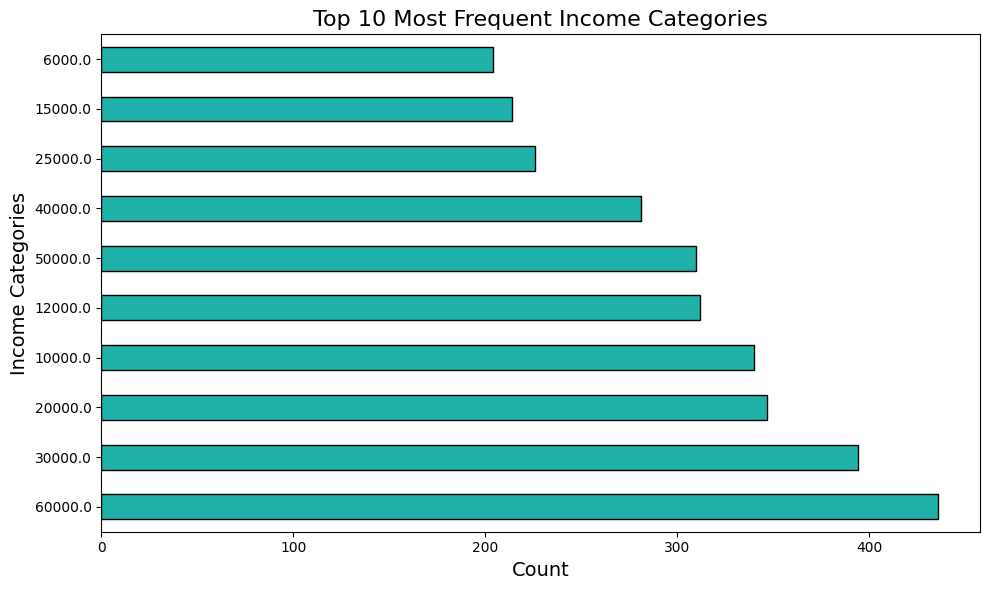

In [62]:
# Plotting the distribution of 'Income' with a logarithmic scale

# Count the occurrences of each category in 'Income'
income_counts = df_fds['Income'].value_counts()

# Limit to top 10 most frequent categories
top_10_income = income_counts.head(10)

# Plotting the top 10 most frequent income categories
plt.figure(figsize=(10, 6))
top_10_income.plot(kind='barh', color='lightseagreen', edgecolor='black')

# Adding title and labels
plt.title("Top 10 Most Frequent Income Categories", fontsize=16)
plt.xlabel("Count", fontsize=14)
plt.ylabel("Income Categories", fontsize=14)
plt.tight_layout()  # Adjust the layout for better spacing
plt.show()


Given that this data is international, the variation of purchasing power across the world. Thus, the income categories is not a direct reflection of the financial status of the individuals concerned. If the entries were adjusted to their respective countries it would have led to better financial categorization to assess probability of succes of 60$/month subcription.

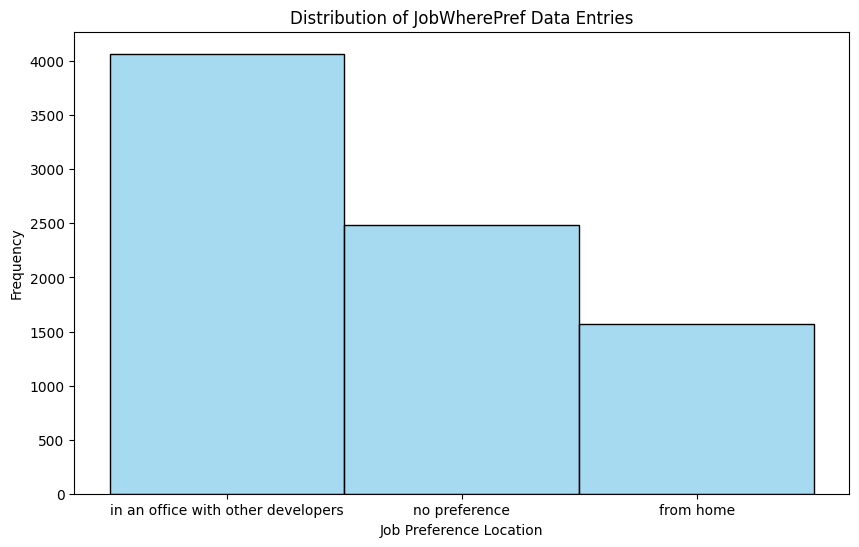

In [63]:
# Job preference location
plt.figure(figsize=(10, 6))
sns.histplot(df_fds['JobWherePref'], kde=False, bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of JobWherePref Data Entries')
plt.xlabel('Job Preference Location')
plt.ylabel('Frequency')
plt.show()


This is a clear indicator that these individuals want to interact with other developer to be able to acheive more. It represents an opportunity for live events.

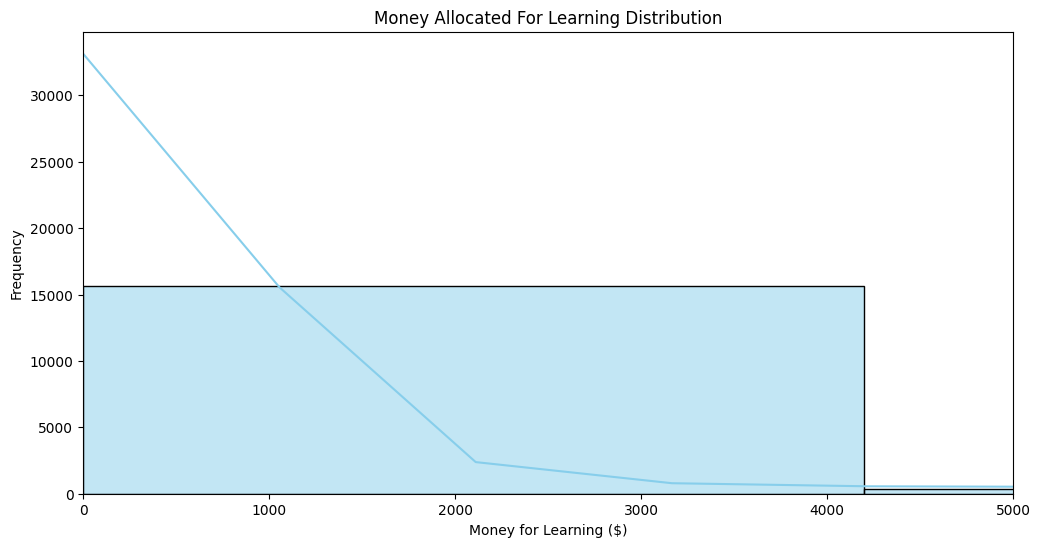

In [64]:
# Money allocated for learning distribution
plt.figure(figsize=(12,6))
sns.histplot(df_fds['MoneyForLearning'], kde=True, color='skyblue', edgecolor='black', bins=50)
plt.title('Money Allocated For Learning Distribution')
plt.xlabel('Money for Learning ($)')
plt.ylabel('Frequency')
plt.xlim(0, 5000)  # Set the x-axis limit to focus on meaningful range
plt.show()



The histogram shows that most respondents allocate a small amount of money for learning, with the majority spending under $1000.
- There's a sharp decline in frequency after $1000, indicating fewer people invest large sums in education. A few outliers report spending significantly more, but these don't affect the general trend. This suggests that most people spend modestly on learning resources.
- This entails that a 60$/month is somewhat challenging for a large portion of the survey takers.

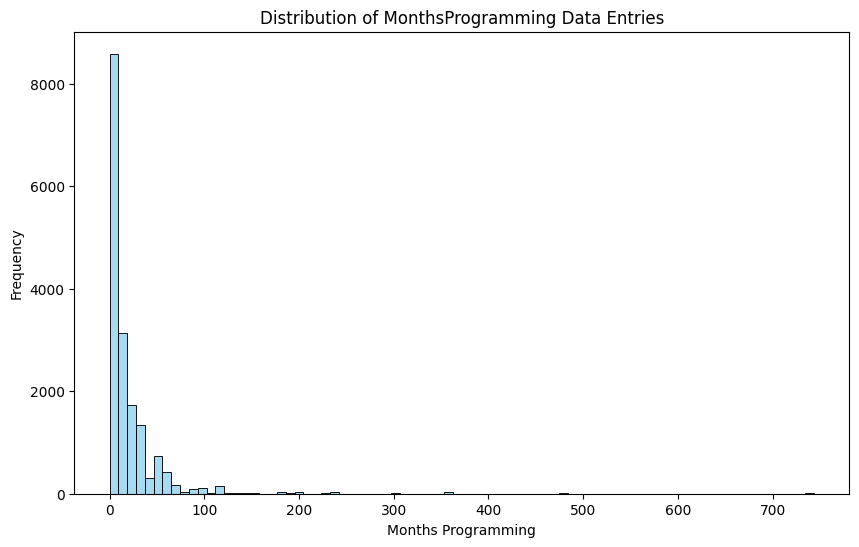

In [65]:
#MonthsProgramming
plt.figure(figsize=(10, 6))
sns.histplot(df_fds['MonthsProgramming'], kde=False, bins=80, color='skyblue', edgecolor='black')
plt.title('Distribution of MonthsProgramming Data Entries')
plt.xlabel('Months Programming')
plt.ylabel('Frequency')
plt.show()


The majority survey takers had minimal months of programming. Given the information here, there is a steep decline as soon as the months start to pile up. The targeted customers should be anyone that falls in the category after the decline as enough time has passed to show genuine intrest towards programming. Thus, the offer from the subscription plan would be deemed more valuable and would convert to higher success rate.

### E. Platform interaction

In [66]:
# Count occurrences of 1 in each row
row_count_ones = df_fds.apply(lambda row: row.eq(1).sum(), axis=1)

# Display the result
print(row_count_ones)


0         8
1        13
2        24
3        16
4         8
         ..
18170    10
18171    27
18172    19
18173    11
18174    15
Length: 18175, dtype: int64


This code counts the number of occurrences of the value 1 in each row of the DataFrame df_fds. It then stores the count for each row in the row_count_ones series and prints the result. This is being done given the repeated occurences of columns with the prefix code,res or youtube with binary input to track engagement on different platform. Thus, there was the need to combine the sumation of all binary input for each platform to create a score of engagement.

####Code

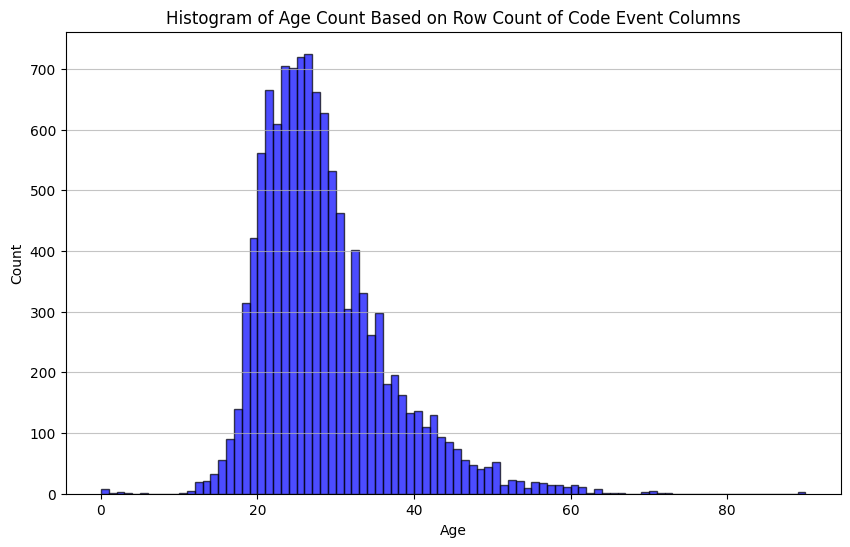

In [67]:
# Columns of interest for code events
columns_of_interest = [
    'CodeEventConferences', 'CodeEventDjangoGirls', 'CodeEventFCC',
    'CodeEventGameJam', 'CodeEventGirlDev', 'CodeEventHackathons',
    'CodeEventMeetup', 'CodeEventNodeSchool', 'CodeEventNone',
    'CodeEventOther', 'CodeEventRailsBridge', 'CodeEventRailsGirls',
    'CodeEventStartUpWknd', 'CodeEventWkdBootcamps', 'CodeEventWomenCode',
    'CodeEventWorkshops'
]

# Check if all columns in columns_of_interest are present in df_fds
for column in columns_of_interest:
    if column not in df_fds.columns:
        print(f"Column '{column}' not found in DataFrame.")

# Only include columns that are present in the DataFrame
valid_columns = [col for col in columns_of_interest if col in df_fds.columns]

# Count occurrences of 1 in the valid columns for each row
row_count_ones = df_fds[valid_columns].apply(lambda row: row.eq(1).sum(), axis=1)

# Add the row count and Age to a new DataFrame
age_row_count_df = pd.DataFrame({'Age': df_fds['Age'], 'RowCount': row_count_ones})

# Drop rows where Age or RowCount is NaN
age_row_count_df.dropna(inplace=True)

# Create a histogram of RowCount grouped by Age
plt.figure(figsize=(10, 6))
plt.hist(age_row_count_df['Age'],
         bins=range(int(age_row_count_df['Age'].min()), int(age_row_count_df['Age'].max()) + 1),
         weights=age_row_count_df['RowCount'],
         alpha=0.7, color='blue', edgecolor='black')

plt.title('Histogram of Age Count Based on Row Count of Code Event Columns')
plt.xlabel('Age')
plt.ylabel('Count')
plt.grid(axis='y', alpha=0.75)
plt.show()

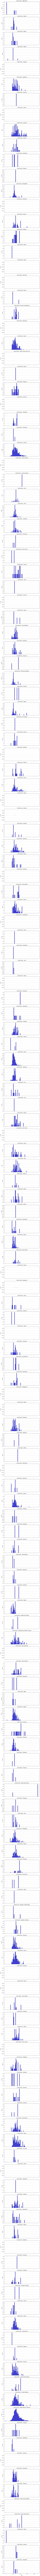

In [68]:
# Columns of interest for code events
columns_of_interest = [
    'CodeEventConferences', 'CodeEventDjangoGirls', 'CodeEventFCC',
    'CodeEventGameJam', 'CodeEventGirlDev', 'CodeEventHackathons',
    'CodeEventMeetup', 'CodeEventNodeSchool', 'CodeEventNone',
    'CodeEventOther', 'CodeEventRailsBridge', 'CodeEventRailsGirls',
    'CodeEventStartUpWknd', 'CodeEventWkdBootcamps', 'CodeEventWomenCode',
    'CodeEventWorkshops'
]

# Check if all columns in columns_of_interest are present in df_fds
for column in columns_of_interest:
    if column not in df_fds.columns:
        print(f"Column '{column}' not found in DataFrame.")

# Only include columns that are present in the DataFrame
valid_columns = [col for col in columns_of_interest if col in df_fds.columns]

# Count occurrences of 1 in the valid columns for each row
row_count_ones = df_fds[valid_columns].apply(lambda row: row.eq(1).sum(), axis=1)

# Add the row count, Age, and CountryLive to a new DataFrame
age_row_count_df = pd.DataFrame({'Age': df_fds['Age'], 'RowCount': row_count_ones, 'CountryLive': df_fds['CountryLive']})

# Drop rows where Age, RowCount, or CountryLive is NaN
age_row_count_df.dropna(inplace=True)

# Group by CountryLive and Age, summing the RowCount
grouped_df = age_row_count_df.groupby(['CountryLive', 'Age']).sum().reset_index()

# Create subplots for each country
countries = grouped_df['CountryLive'].unique()
n_countries = len(countries)

# Set up the figure and axes
fig, axes = plt.subplots(n_countries, 1, figsize=(8, 3 * n_countries), sharex=True)

for ax, country in zip(axes, countries):
    country_data = grouped_df[grouped_df['CountryLive'] == country]

    ax.hist(country_data['Age'],
            bins=range(int(country_data['Age'].min()), int(country_data['Age'].max()) + 1),
            weights=country_data['RowCount'],
            alpha=0.7,
            color='blue',
            edgecolor='black')

    ax.set_title(f'Code Events - {country}')
    ax.set_ylabel('Count')
    ax.grid(axis='y', alpha=0.75)

plt.xlabel('Age')
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

####Resource

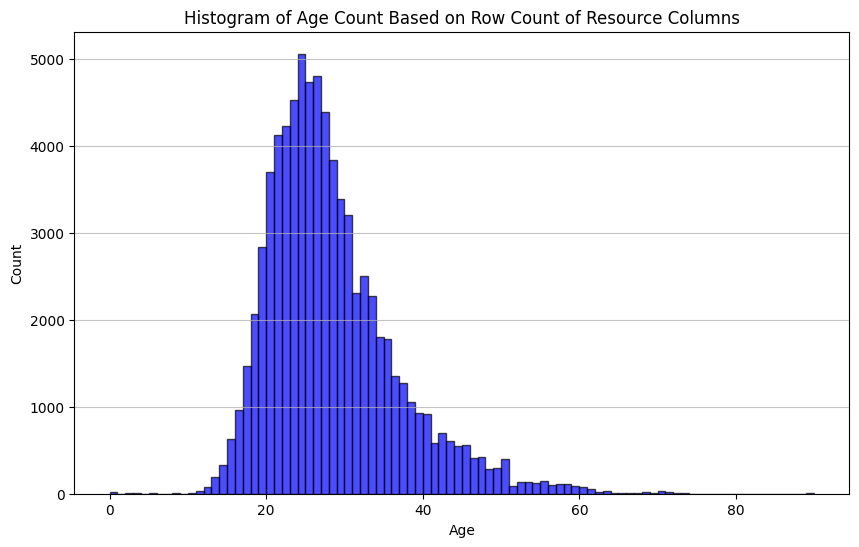

In [69]:
# Columns of interest for resources
columns_of_interest = [
    'ResourceCodecademy', 'ResourceCodeWars', 'ResourceCoursera', 'ResourceCSS',
    'ResourceEdX', 'ResourceEgghead', 'ResourceFCC', 'ResourceHackerRank',
    'ResourceKA', 'ResourceLynda', 'ResourceMDN', 'ResourceOdinProj',
    'ResourceOther', 'ResourcePluralSight', 'ResourceSkillcrush',
    'ResourceSO', 'ResourceTreehouse', 'ResourceUdacity', 'ResourceUdemy',
    'ResourceW3S'
]

# Check if all columns in columns_of_interest are present in df_fds
for column in columns_of_interest:
    if column not in df_fds.columns:
        print(f"Column '{column}' not found in DataFrame.")

# Only include columns that are present in the DataFrame
valid_columns = [col for col in columns_of_interest if col in df_fds.columns]

# Count occurrences of 1 in the valid columns for each row
row_count_ones = df_fds[valid_columns].apply(lambda row: row.eq(1).sum(), axis=1)

# Add the row count and Age to a new DataFrame
age_row_count_df = pd.DataFrame({'Age': df_fds['Age'], 'RowCount': row_count_ones})

# Drop rows where Age or RowCount is NaN
age_row_count_df.dropna(inplace=True)

# Create a histogram of RowCount grouped by Age
plt.figure(figsize=(10, 6))
plt.hist(age_row_count_df['Age'],
         bins=range(int(age_row_count_df['Age'].min()), int(age_row_count_df['Age'].max()) + 1),
         weights=age_row_count_df['RowCount'],
         alpha=0.7, color='blue', edgecolor='black')

plt.title('Histogram of Age Count Based on Row Count of Resource Columns')
plt.xlabel('Age')
plt.ylabel('Count')
plt.grid(axis='y', alpha=0.75)
plt.show()


#### Youtube

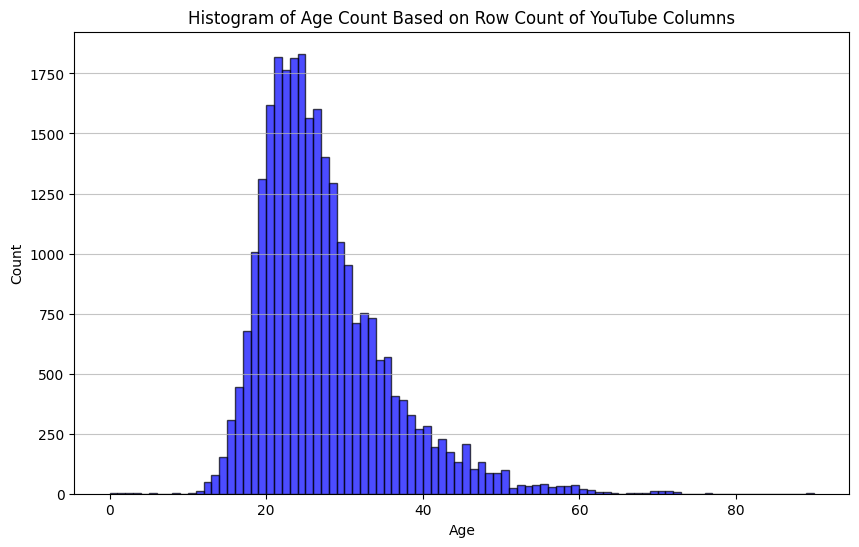

In [70]:
# Columns of interest for YouTube
columns_of_interest = [
    'YouTubeCodeCourse', 'YouTubeCodingTrain', 'YouTubeCodingTut360',
    'YouTubeComputerphile', 'YouTubeDerekBanas', 'YouTubeDevTips',
    'YouTubeEngineeredTruth', 'YouTubeFCC', 'YouTubeFunFunFunction',
    'YouTubeGoogleDev', 'YouTubeLearnCode', 'YouTubeLevelUpTuts',
    'YouTubeMIT', 'YouTubeMozillaHacks', 'YouTubeOther',
    'YouTubeSimplilearn', 'YouTubeTheNewBoston'
]

# Check if all columns in columns_of_interest are present in df_fds
for column in columns_of_interest:
    if column not in df_fds.columns:
        print(f"Column '{column}' not found in DataFrame.")

# Only include columns that are present in the DataFrame
valid_columns = [col for col in columns_of_interest if col in df_fds.columns]

# Count occurrences of 1 in the valid columns for each row
row_count_ones = df_fds[valid_columns].apply(lambda row: row.eq(1).sum(), axis=1)

# Add the row count and Age to a new DataFrame
age_row_count_df = pd.DataFrame({'Age': df_fds['Age'], 'RowCount': row_count_ones})

# Drop rows where Age or RowCount is NaN
age_row_count_df.dropna(inplace=True)

# Create a histogram of RowCount grouped by Age
plt.figure(figsize=(10, 6))
plt.hist(age_row_count_df['Age'],
         bins=range(int(age_row_count_df['Age'].min()), int(age_row_count_df['Age'].max()) + 1),
         weights=age_row_count_df['RowCount'],
         alpha=0.7, color='blue', edgecolor='black')

plt.title('Histogram of Age Count Based on Row Count of YouTube Columns')
plt.xlabel('Age')
plt.ylabel('Count')
plt.grid(axis='y', alpha=0.75)
plt.show()

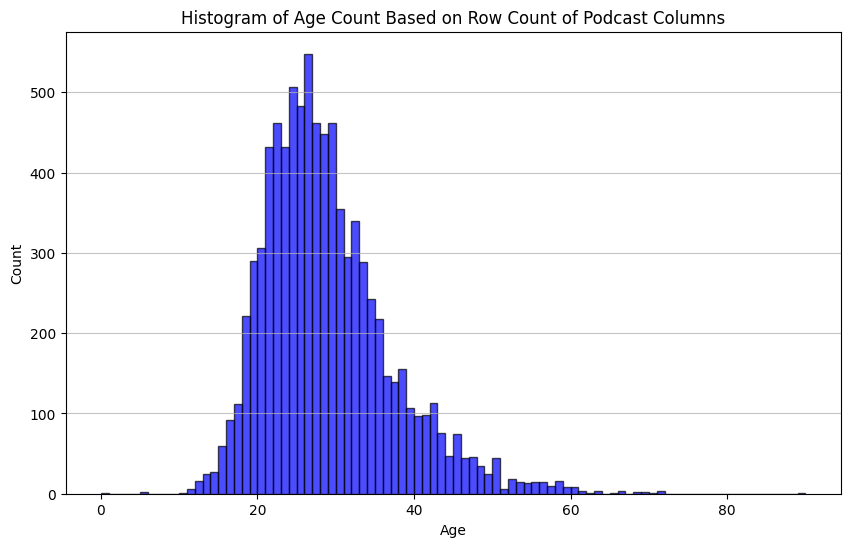

In [71]:
# Create a histogram of RowCount grouped by Age
columns_of_interest = [
    'PodcastChangeLog', 'PodcastCodeNewbie', 'PodcastCodePen',
    'PodcastDevTea', 'PodcastDotNET', 'PodcastGiantRobots',
    'PodcastJSAir', 'PodcastJSJabber', 'PodcastNone',
    'PodcastOther', 'PodcastProgThrowdown', 'PodcastRubyRogues',
    'PodcastSEDaily', 'PodcastSERadio', 'PodcastShopTalk',
    'PodcastTalkPython', 'PodcastTheWebAhead'
]

# Count occurrences of 1 in the valid columns for each row
valid_columns = [col for col in columns_of_interest if col in df_fds.columns]
row_count_ones = df_fds[valid_columns].apply(lambda row: row.eq(1).sum(), axis=1)

# Add the row count and Age to a new DataFrame
age_row_count_df = pd.DataFrame({'Age': df_fds['Age'], 'RowCount': row_count_ones})

# Drop rows where Age or RowCount is NaN
age_row_count_df.dropna(inplace=True)

# Create a histogram of RowCount grouped by Age
plt.figure(figsize=(10, 6))
plt.hist(age_row_count_df['Age'], bins=range(int(age_row_count_df['Age'].min()), int(age_row_count_df['Age'].max()) + 1), weights=age_row_count_df['RowCount'], alpha=0.7, color='blue', edgecolor='black')

plt.title('Histogram of Age Count Based on Row Count of Podcast Columns')
plt.xlabel('Age')
plt.ylabel('Count')
plt.grid(axis='y', alpha=0.75)
plt.show()


Code Events Target Segment: Young Adults (Ages 20-30) Characteristics: Likely seeking hands-on experience and networking opportunities. Strategy: Promote workshops, bootcamps, and certification programs that cater to their desire for skill development and career advancement.
Resource Columns Target Segment: Early Career Professionals (Ages 20-35) Characteristics: This group is looking for resources to enhance their skills and improve employability. Strategy: Introduce subscription models for premium content, personalized learning paths, and opportunities for community engagement.
YouTube Target Segment: Tech-Savvy Learners (Ages 18-35) Characteristics: Engaged with visual, on-demand content and likely to invest in structured learning. Strategy: Convert popular video content into monetized courses and offer exclusive content through platforms like Patreon.
Podcasts Target Segment: Listeners Seeking Professional Growth (Ages 25-40) Characteristics: This demographic may be looking for insights, expert advice, and networking opportunities. Strategy: Focus on sponsorships, creating paid memberships for exclusive content, and organizing live events for deeper engagement.
Summary of Customer Segments by Channel:

Code Events: Young Adults (20-30)
Resource Columns: Early Career Professionals (20-35)
YouTube: Tech-Savvy Learners (18-35)
Podcasts: Listeners Seeking Professional Growth (25-40)

# Insights & Recommendations

- Customer Acquisition Channels:

Facebook is the most effective channel, driving the highest engagement. Google and YouTube show moderate engagement. Twitter should be deprioritized.
Recommendation: Focus acquisition efforts on Facebook, with secondary campaigns on Google and YouTube.

- Best Markets for Subscription Plan:

United States and India are the top markets, with the U.S. having strong purchasing power and India presenting a high-growth opportunity.
Recommendation: Prioritize U.S. for premium pricing and India for tiered pricing to accommodate budget sensitivity.

- Targeted Customer Segmentation:

Young Adults (20-30): Target with hands-on workshops and bootcamps.
Early Career Professionals (20-35): Focus on subscription bundles for skill enhancement.
Tech-Savvy Learners (18-35): Monetize video content and create exclusive courses.
Professional Growth Seekers (25-40): Offer exclusive content through membership and networking events.

- Subscription Strategy:

Implement tiered pricing with basic and premium options, and introduce discounts or trials to build trust.
Offer quarterly/yearly payment plans for higher engagement.

- Marketing Execution:

Scale campaigns on Facebook and Google, leverage YouTube for younger audiences, and use incentivized referrals (Additional discounts) for organic growth.
Implement localized strategies for regions like India and Western Europe to maximize global reach.
This data-driven strategy will ensure efficient acquisition, increased engagement, and optimized revenue growth for the $60/month subscription plan.